# Tutorial for HN_derivative module

In [1]:
# import the necessary packages along with HavNegpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import HavNegpy as dd
%matplotlib qt

## Example of a single derivative HN fit

**Often the loss peak is obscured by conductivity and electrode polarization contribution**
**The derivative technique or the conductivity free loss spectra removes the ohmic contribution and the loss peak becomes more pronounced**
**Note: It is the derivative of the real part of the permittvity as a function of log frequency and not the imaginary part**


**The mathematical expression is:**
$$ \epsilon_{deriv} = \frac{-d\epsilon^{´}}{dlogf} = (\epsilon^{´´})^{2}$$

In [2]:
# extract the data and take derivative

filename = 'deri_hn_example_data.txt'
col_names = ['Freq','Eps1','Eps2']
df = pd.read_csv(filename, sep='\t',index_col=False,usecols = [0,1,2],names=col_names,header=None,skiprows=3,encoding='unicode_escape',engine='python')
f = df['Freq']
e1 = df['Eps1']
e2 = df['Eps2']

x = np.log10(f)
# taking derivative
dx = np.gradient(x)
dy = np.gradient(e1)

e_d = -(dy/dx)

y = np.log10(e_d)

# regular dielectric loss
y2 = np.log10(e2)



**Comparing the derivative and normal dielectric loss**

In [3]:
# twin plot
fig,ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('log f [Hz]')
ax1.set_ylabel('log $\epsilon$"',color=color)
ax1.scatter(x,y2,color=color)
ax2 = ax1.twinx()
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:red'
ax2.set_ylabel('log ( d$\epsilon´$/ dlog f )',color=color)
ax2.scatter(x,y,color=color)
ax2.tick_params(axis='y', labelcolor=color)
#fig.tight_layout()
plt.title('Derivative Comparison')
#ax1.legend()



Text(0.5, 1.0, 'Derivative Comparison')

**Twin Plot**
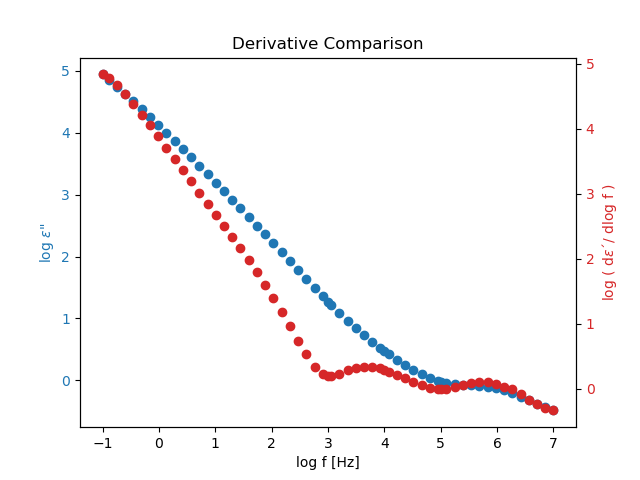

In [4]:
# instantiate the HN module
hn = dd.HN_derivative()

**Select the region of interest (ROI) to fit the data using the select range method**. <br> 
The data in ROI is shown as image in the next cell

In [5]:
#select range
x1,y1 = hn.select_range(x,y)

x_lower_limit 3.336427528448189 x_upper_limit 4.78492686549629


In [6]:
plt.scatter(x1,y1)
plt.xlabel('log f [Hz]')
plt.ylabel('log ( d$\epsilon´$/ dlog f )')

Text(0, 0.5, 'log ( d$\\epsilon´$/ dlog f )')

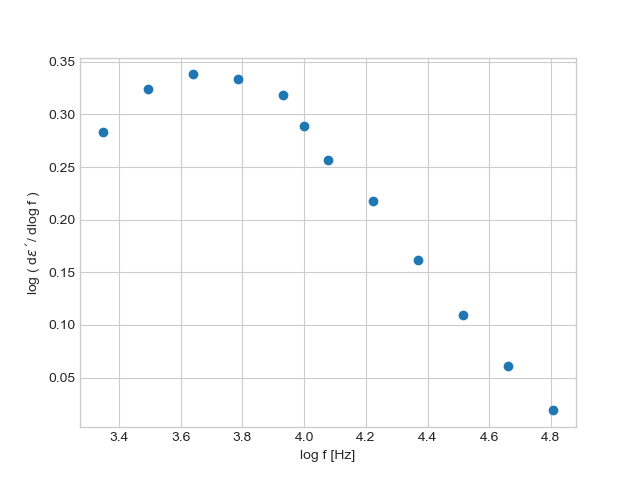

In [7]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_deri_hn()


enter the beta value:0.5
enter the gamma value:1
enter the fm:3.7
enter the deps:10
enter the E.P value:0.1
enter the s:10
dumped_parameters {'beta': 0.5, 'gamma': 1.0, 'freq': 5011.872336272725, 'deps': 10.0, 'ep': 0.1, 's': 10.0}


()

In [8]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_deri_hn(x1,y1)

loaded parameters 
 {'beta': 0.5, 'gamma': 1.0, 'freq': 5011.872336272725, 'deps': 10.0, 'ep': 0.1, 's': 10.0}


**Plot of the initial fit based on the supplied parameters**
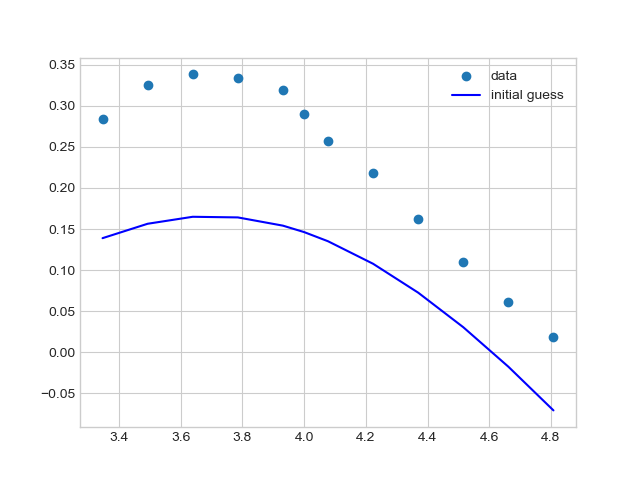

In [9]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function:
 1 -- deri_HN
 2-- deri_HN with EP
 3 -- double_deri_HN
1
0.8743134274054571 0.3894566919293242 2110.7173828498676 10.972522760387898
log fmax: 3.721481303152409
fit parameters dumped for next iteration {'beta': 0.8743134274054571, 'gamma': 0.3894566919293242, 'freq': 2110.7173828498676, 'deps': 10.972522760387898, 'ep': 0, 's': 1}


**Plot of the final fit of the deri HN function**
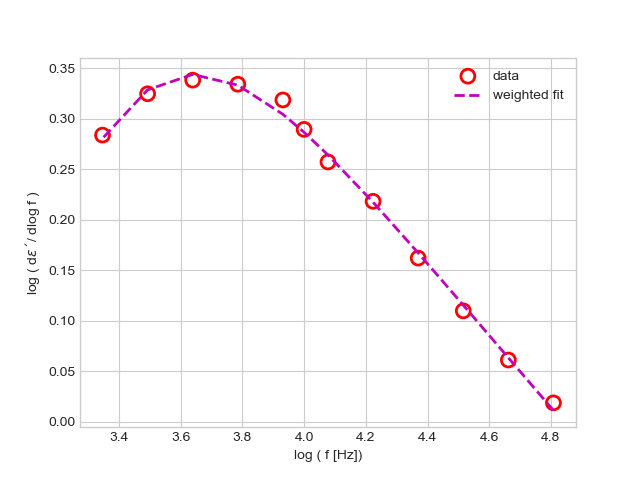

 **An analysis file has to be created only once during the whole run (i.e. all fit runs can be saved in the same file, unless you change the function or require saving separate processes in separate files.)**

In [10]:
# before saving fit results an analysis file has to be created using create_analysis file method

hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:y
Enter the analysis_file_name:deri_hn_fit.TXT
file exists


()

In [11]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_deri_hn(1)

()

## Derivative HN function together with Electrode Polarization (EP) contribution.
**We will use the same data set but will include the EP slope for analysis.**

**Select the region of interest (ROI) to fit the data using the select range method**. 
>The data in ROI is shown as image in the next cell

In [12]:
#select range
# select peak along with EP slope
x1,y1 = hn.select_range(x,y)

x_lower_limit 2.6326448519295482 x_upper_limit 4.678897072477492


In [13]:
plt.scatter(x1,y1)
plt.xlabel('log f [Hz]')
plt.ylabel('log ( d$\epsilon´$/ dlog f )')

Text(0, 0.5, 'log ( d$\\epsilon´$/ dlog f )')

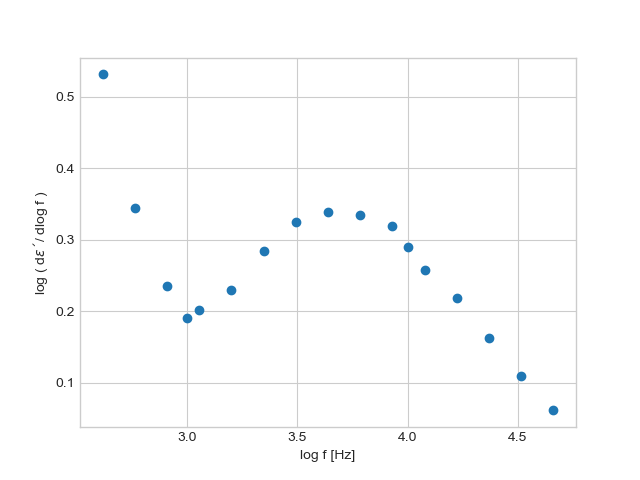

In [14]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_deri_hn()

enter the beta value:0.87
enter the gamma value:0.4
enter the fm:3.7
enter the deps:11
enter the E.P value:10
enter the s:0.8
dumped_parameters {'beta': 0.87, 'gamma': 0.4, 'freq': 5011.872336272725, 'deps': 11.0, 'ep': 10.0, 's': 0.8}


()

In [15]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_deri_hn_ep(x1,y1)

loaded parameters 
 {'beta': 0.87, 'gamma': 0.4, 'freq': 5011.872336272725, 'deps': 11.0, 'ep': 10.0, 's': 0.8}


**Plot of the initial fit based on the supplied parameters**
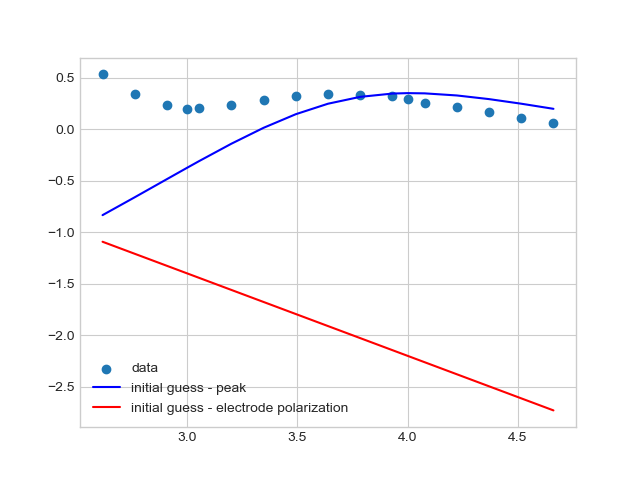

In [16]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function:
 1 -- deri_HN
 2-- deri_HN with EP
 3 -- double_deri_HN
2
0.9999999999999263 0.30272223892160405 2726.031593760782 9.452742872380538 1226.423197994526 0.9999999999999816
log fmax: 3.8533074167765435
fit parameters dumped for next iteration {'beta': 0.9999999999999263, 'gamma': 0.30272223892160405, 'freq': 2726.031593760782, 'deps': 9.452742872380538, 'ep': 1226.423197994526, 's': 0.9999999999999816}


**Plot of the final fit of the deri HN function with EP**
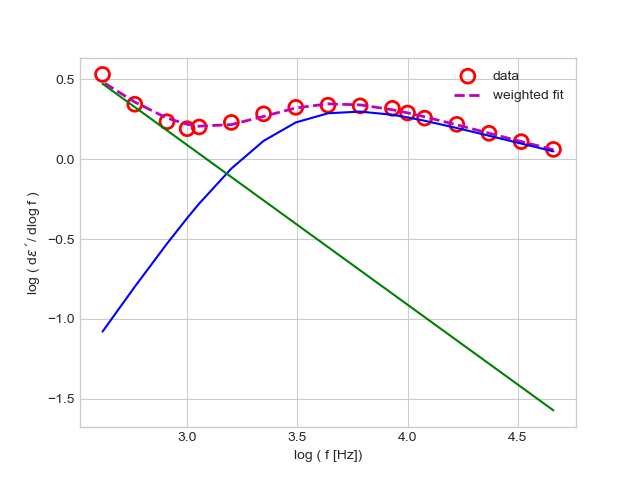

In [17]:
# before saving fit results an analysis file has to be created using create_analysis file method

hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function:
 1 -- deri_HN
 2-- deri_HN with EP
 3 -- double_deri_HN
2
Enter the analysis_file_name:deri_hn_ep.TXT
file did not exist, created deri_hn_ep.TXT


()

In [18]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_deri_hn(1)

()

## Fitting example for double HN function
**We will now look at an example to fit two HN functions using the same datafile**

**Select the region of interest (ROI) to fit the data using the select range method**. 
>The data in ROI is shown as image in the next cell

In [19]:
#select range
x1,y1 = hn.select_range(x,y)

x_lower_limit 3.336575800996946 x_upper_limit 6.308199991188614


In [20]:
plt.scatter(x1,y1)
plt.xlabel('log f [Hz]')
plt.ylabel('log ( d$\epsilon´$/ dlog f )')

Text(0, 0.5, 'log ( d$\\epsilon´$/ dlog f )')

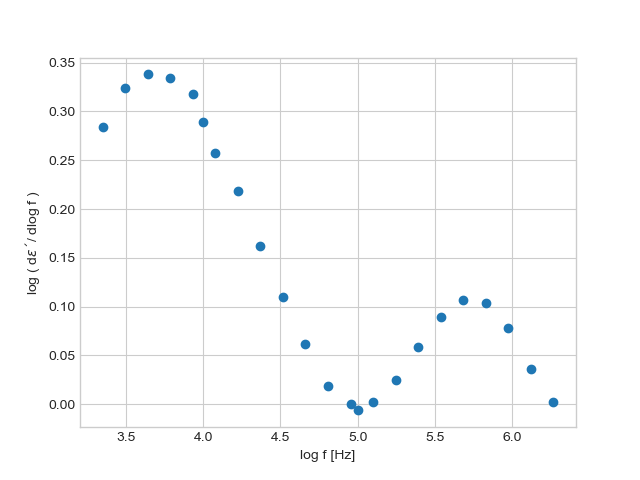

In [23]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_deri_double_hn()

enter the beta1 value:0.87
enter the gamma1 value:0.4
enter the fmax1:3.75
enter the deps1:11
enter the beta2 value:0.8
enter the gamma2 value:0.7
enter the fmax2:5.75
enter the deps2:5.5
enter the E.P value:0
enter the s:1
dumped_parameters {'beta1': 0.87, 'gamma1': 0.4, 'freq1': 5623.413251903491, 'deps1': 11.0, 'beta2': 0.8, 'gamma2': 0.7, 'freq2': 562341.3251903491, 'deps2': 5.5, 'ep': 0.0, 's': 1.0}


()

In [24]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_deri_double_hn(x1,y1)

loaded parameters 
 {'beta1': 0.87, 'gamma1': 0.4, 'freq1': 5623.413251903491, 'deps1': 11.0, 'beta2': 0.8, 'gamma2': 0.7, 'freq2': 562341.3251903491, 'deps2': 5.5, 'ep': 0.0, 's': 1.0}


**Plot of the initial fit based on the supplied parameters**
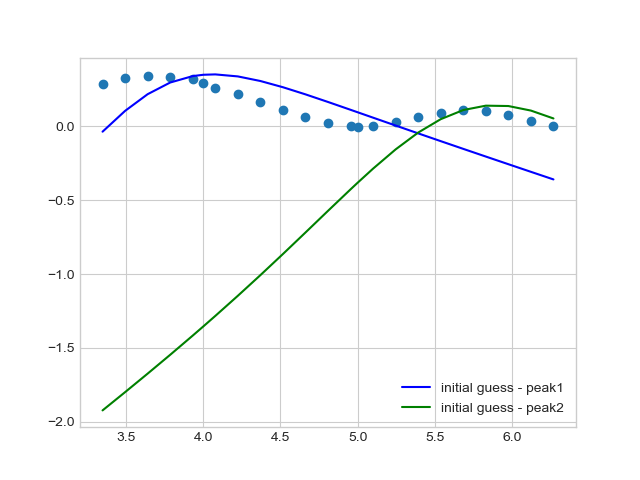

In [25]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function:
 1 -- deri_HN
 2-- deri_HN with EP
 3 -- double_deri_HN
3
[0.87, 0.4, 5623.413251903491, 11.0, 0.8, 0.7, 562341.3251903491, 5.5]
log fmax1: 3.705619322917452 
log fmax2: 5.936248537403254
fit parameters dumped for next iteration {'beta1': 0.7818622198165105, 'gamma1': 0.5488332751217193, 'freq1': 2595.3686767985687, 'deps1': 10.469910357129896, 'beta2': 0.9202494000493214, 'gamma2': 0.3219547485269172, 'freq2': 308821.2152266843, 'deps2': 4.899440972296858, 'ep': 0, 's': 1}


**Plot of the final fit of the double deri HN function**
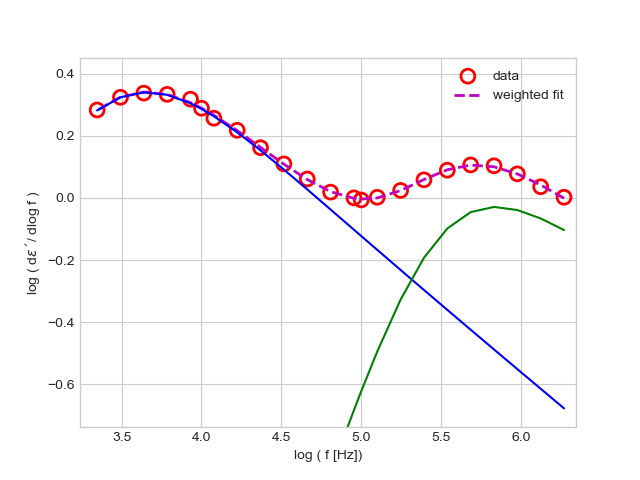

In [26]:
# before saving fit results an analysis file has to be created using create_analysis file method

hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function:
 1 -- deri_HN
 2-- deri_HN with EP
 3 -- double_deri_HN
3
Enter the analysis_file_name:deri_double_hn_fit.TXT
file did not exist, created deri_double_hn_fit.TXT


()

In [27]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_deri_hn(1)

()